In [1]:
#Samuel Tran
#MATH 417 - 504
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import array
import decimal
import sys
from sympy import *

In [2]:
#Let f(x) = 1/(1+25x^2)
def f(x):
    return 1 / (1 + 25*x**2)

In [3]:
#Take x_j = -1 + (2j)/n
def x(j):
    return -1 + ((2*j)/10)

In [4]:
#Let n = 10. Create a list of points x_j for j = 0, 1, ..., n
j_range = 11
points = []
for j in range (j_range):
    points.append(x(j))
print(points)

[-1.0, -0.8, -0.6, -0.4, -0.19999999999999996, 0.0, 0.19999999999999996, 0.3999999999999999, 0.6000000000000001, 0.8, 1.0]


In [5]:
#Create a list of functions at x_j
func = []
for x in range (len(points)):
    func.append(f(points[x]))
print(func)

[0.038461538461538464, 0.05882352941176469, 0.1, 0.19999999999999996, 0.5000000000000001, 1.0, 0.5000000000000001, 0.20000000000000007, 0.09999999999999998, 0.05882352941176469, 0.038461538461538464]


In [6]:
#Coefficient for Lagrange Interpolation
def lagCoeff(k):
    N = len(points)
    total = 1
    for i in range(N):
        if k != i:
            total *= (points[k] - points[i])
    return 1/total

In [7]:
lagCoeff(1)

-26.911444554673704

In [8]:
#Pi Notation for the products of interpolated polynomials
x = symbols('x')
def piNotate(k):
    N = len(points)
    piNotation = 1
    for i in range(N):
        if k != i:
            piNotation *= (x - points[i])
    return piNotation

In [9]:
piNotate(10)

x*(x - 0.8)*(x - 0.6)*(x - 0.4)*(x - 0.2)*(x + 0.2)*(x + 0.4)*(x + 0.6)*(x + 0.8)*(x + 1.0)

In [10]:
#Lagrange Interpolation
def lagInt(k):
    return lagCoeff(k) * piNotate(k)

In [11]:
#Lagrange Polynomials L2, L4, L6, L8
print('L2(x) = ', lagInt(2))
print('L4(x) = ', lagInt(4))
print('L6(x) = ', lagInt(6))
print('L8(x) = ', lagInt(8))
print('L10(x) = ', lagInt(10))

L2(x) =  121.101500496032*x*(x - 1.0)*(x - 0.8)*(x - 0.6)*(x - 0.4)*(x - 0.2)*(x + 0.2)*(x + 0.4)*(x + 0.8)*(x + 1.0)
L4(x) =  565.140335648148*x*(x - 1.0)*(x - 0.8)*(x - 0.6)*(x - 0.4)*(x - 0.2)*(x + 0.4)*(x + 0.6)*(x + 0.8)*(x + 1.0)
L6(x) =  565.140335648148*x*(x - 1.0)*(x - 0.8)*(x - 0.6)*(x - 0.4)*(x + 0.2)*(x + 0.4)*(x + 0.6)*(x + 0.8)*(x + 1.0)
L8(x) =  121.101500496032*x*(x - 1.0)*(x - 0.8)*(x - 0.4)*(x - 0.2)*(x + 0.2)*(x + 0.4)*(x + 0.6)*(x + 0.8)*(x + 1.0)
L10(x) =  2.69114445546737*x*(x - 0.8)*(x - 0.6)*(x - 0.4)*(x - 0.2)*(x + 0.2)*(x + 0.4)*(x + 0.6)*(x + 0.8)*(x + 1.0)


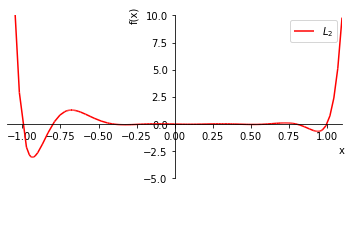

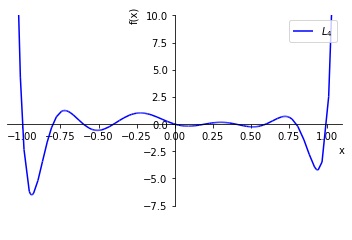

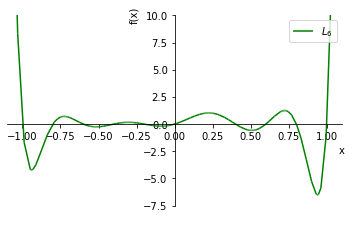

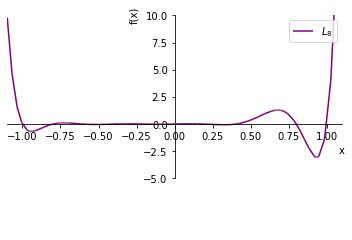

In [12]:
L2 = lagInt(2)
L4 = lagInt(4)
L6 = lagInt(6)
L8 = lagInt(8)

pL2 = plot(L2, (x,-1.10,1.10), ylim=[-10, 10], show = false, legend = True, line_color = 'red')
pL4 = plot(L4, (x,-1.10,1.10), ylim=[-10, 10], show = false, legend = True, line_color = 'blue')
pL6 = plot(L6, (x,-1.10,1.10), ylim=[-10, 10], show = false, legend = True, line_color = 'green')
pL8 = plot(L8, (x,-1.10,1.10), ylim=[-10, 10], show = false, legend = True, line_color = 'purple')
pL2[0].label = '$L_2$'
pL4[0].label = '$L_4$'
pL6[0].label = '$L_6$'
pL8[0].label = '$L_8$'
pL2.show()
pL4.show()
pL6.show()
pL8.show()

In [13]:
#Let n = 10 and Pn(x) be the n-th Lagrange interpolation polynomial
#P_n(x) = \sum_{k=0}^n f(x_k)L_k(x)
P_n = 0
N = len(func)
for k in range(N):
    P_n += (func[k]*lagInt(k))
print ('P_n(x) = ',P_n) 

P_n(x) =  0.103505555979514*x*(x - 1.0)*(x - 0.8)*(x - 0.6)*(x - 0.4)*(x - 0.2)*(x + 0.2)*(x + 0.4)*(x + 0.6)*(x + 0.8) - 1.58302615027492*x*(x - 1.0)*(x - 0.8)*(x - 0.6)*(x - 0.4)*(x - 0.2)*(x + 0.2)*(x + 0.4)*(x + 0.6)*(x + 1.0) + 12.1101500496032*x*(x - 1.0)*(x - 0.8)*(x - 0.6)*(x - 0.4)*(x - 0.2)*(x + 0.2)*(x + 0.4)*(x + 0.8)*(x + 1.0) - 64.5874669312169*x*(x - 1.0)*(x - 0.8)*(x - 0.6)*(x - 0.4)*(x - 0.2)*(x + 0.2)*(x + 0.6)*(x + 0.8)*(x + 1.0) + 282.570167824074*x*(x - 1.0)*(x - 0.8)*(x - 0.6)*(x - 0.4)*(x - 0.2)*(x + 0.4)*(x + 0.6)*(x + 0.8)*(x + 1.0) + 282.570167824074*x*(x - 1.0)*(x - 0.8)*(x - 0.6)*(x - 0.4)*(x + 0.2)*(x + 0.4)*(x + 0.6)*(x + 0.8)*(x + 1.0) - 64.5874669312169*x*(x - 1.0)*(x - 0.8)*(x - 0.6)*(x - 0.2)*(x + 0.2)*(x + 0.4)*(x + 0.6)*(x + 0.8)*(x + 1.0) + 12.1101500496032*x*(x - 1.0)*(x - 0.8)*(x - 0.4)*(x - 0.2)*(x + 0.2)*(x + 0.4)*(x + 0.6)*(x + 0.8)*(x + 1.0) - 1.58302615027492*x*(x - 1.0)*(x - 0.6)*(x - 0.4)*(x - 0.2)*(x + 0.2)*(x + 0.4)*(x + 0.6)*(x + 0.8)*(x

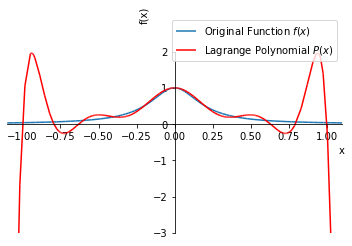

In [14]:
#Plot P_n(x) and f(x)
p = plot(f(x), P_n, (x,-1.10,1.10), ylim=[-3, 3], show = false, legend = True)
p[0].label = 'Original Function $f(x)$'
p[1].line_color = 'red'
p[1].label = 'Lagrange Polynomial $P(x)$'
p.show()

In [15]:
#Piecewise Polynomial
def piecewise(x, x0, y0, x1, y1):
        return ((y1-y0)/(x1-x0))*x + (y0 - ((y1-y0)/(x1-x0))*x0)

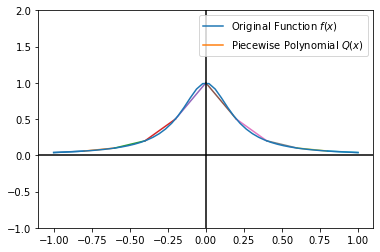

In [16]:
#Plot Q(x) and f(x)
x_range = points
plt.ylim((-1,2))
for i in range(len(points) - 1):
    X = np.linspace(x_range[i], x_range[i+1], 10, endpoint=True)
    y1 = f(x_range[i])
    y2 = f(x_range[i+1])
    F = piecewise(X, x_range[i], y1, x_range[i+1], y2)
    plt.plot(X, F)
X = np.linspace(-1, 1, 50, endpoint=True)
plt.plot(X, f(X))
plt.legend(['Original Function $f(x)$', 'Piecewise Polynomial $Q(x)$'])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()
